##### Import data

In [1]:
#pip install statsbombpy

In [2]:
import matplotlib.pyplot as plt

In [3]:
#pip install mplsoccer

In [4]:
from statsbombpy import sb

In [5]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch

In [6]:
events_df = sb.matches(competition_id=9, season_id=281)

In [7]:
grouped_events = sb.competition_events(
    country="Germany",
    division= "1. Bundesliga",
    season="2023/2024",
    split=True
)

### Team performance : 

In [8]:
leverkusen_data  = events_df[(events_df['home_team'] == 'Bayer Leverkusen') | (events_df['away_team'] == 'Bayer Leverkusen')]

In [9]:
l_home_game =  leverkusen_data[(leverkusen_data['home_team'] == 'Bayer Leverkusen')]
l_away_game =  leverkusen_data[(leverkusen_data['away_team'] == 'Bayer Leverkusen')]

In [10]:
w_l_home_game = l_home_game[(l_home_game['home_score'] > l_home_game['away_score'])]
w_l_away_game = l_away_game[(l_away_game['home_score'] < l_away_game['away_score'])]

Won_leverkusen  = pd.concat([w_l_home_game, w_l_away_game ])

In [11]:
d_l_home_game = l_home_game[(l_home_game['home_score'] == l_home_game['away_score'])]
d_l_away_game = l_away_game[(l_away_game['home_score'] == l_away_game['away_score'])]

draw_leverkusen  = pd.concat([d_l_home_game, d_l_away_game])

#### Plots

#### Goals Scored : 

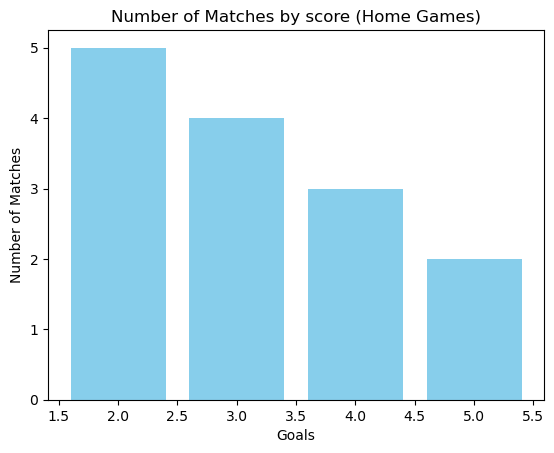

In [12]:
grouped_1 = w_l_home_game.groupby('home_score').size().reset_index(name='count')
plt.figure(figure =(10,6))
plt.bar(grouped_1['home_score'], grouped_1['count'], color='skyblue')
plt.title('Number of Matches by score (Home Games)')
plt.xlabel('Goals')
plt.ylabel('Number of Matches')
plt.show()

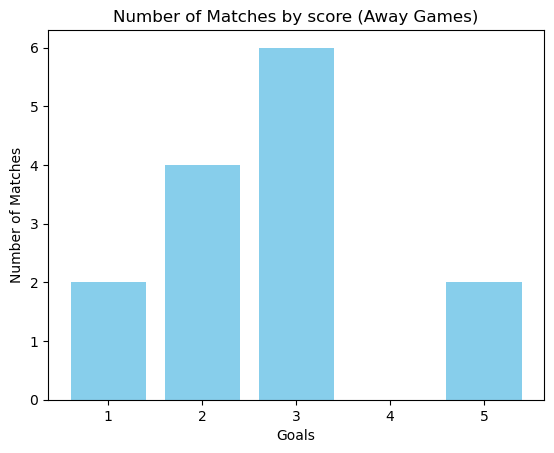

In [13]:
grouped_2 = w_l_away_game.groupby('away_score').size().reset_index(name='count')
plt.figure(figure =(10,6))
plt.bar(grouped_2['away_score'], grouped_2['count'], color='skyblue')
plt.title('Number of Matches by score (Away Games)')
plt.xlabel('Goals')
plt.ylabel('Number of Matches')
plt.show()

##### Goals Conceded : 

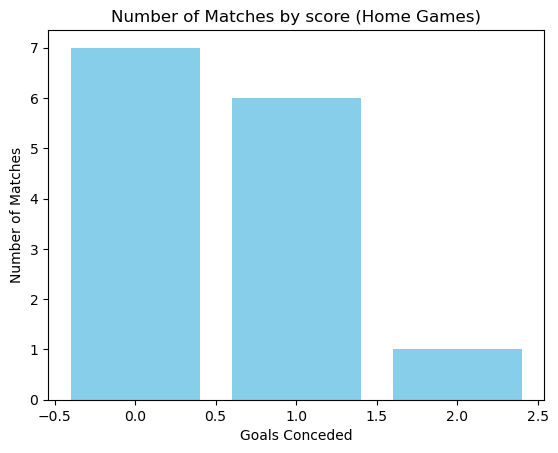

In [14]:
grouped_1 = w_l_home_game.groupby('away_score').size().reset_index(name='count')
plt.figure(figure =(10,6))
plt.bar(grouped_1['away_score'], grouped_1['count'], color='skyblue')
plt.title('Number of Matches by score (Home Games)')
plt.xlabel('Goals Conceded')
plt.ylabel('Number of Matches')
plt.show()

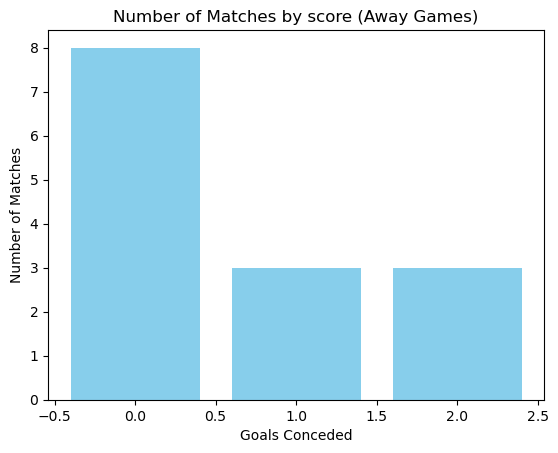

In [15]:
grouped_1 = w_l_away_game.groupby('home_score').size().reset_index(name='count')
plt.figure(figure =(10,6))
plt.bar(grouped_1['home_score'], grouped_1['count'], color='skyblue')
plt.title('Number of Matches by score (Away Games)')
plt.xlabel('Goals Conceded')
plt.ylabel('Number of Matches')
plt.show()

In [16]:
draw_leverkusen[['home_team', 'away_team', 'home_score', 'away_score']]

,home_team,away_team,home_score,away_score
17,Bayer Leverkusen,VfB Stuttgart,2,2
22,Bayer Leverkusen,Borussia Mönchengladbach,0,0
27,Bayer Leverkusen,Borussia Dortmund,1,1
14,Bayern Munich,Bayer Leverkusen,2,2
18,Borussia Dortmund,Bayer Leverkusen,1,1
26,VfB Stuttgart,Bayer Leverkusen,1,1


In [17]:
print('Number of goals scored : 89')
print('Number of goals conceded : 24')    
#togliere

Number of goals scored : 89
Number of goals conceded : 24


## Individual performance :

In [19]:
events = sb.competition_events(
    country="Germany",
    division= "1. Bundesliga",
    season="2023/2024",
    gender="male"
)

In [28]:
grouped_events = sb.competition_events(
    country="Germany",
    division= "1. Bundesliga",
    season="2023/2024",
    gender = 'male',
    split=True
)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Defending : 

In [22]:
#pressures
#duel,interceptions, blocks,clearances

In [34]:
defending_duel = grouped_events["duels"]
defending_interceptions = grouped_events["interceptions"]
defending_ball_blocks = grouped_events["blocks"]
defending_ball_clearances = grouped_events["clearances"]
defending_ball_pressures = grouped_events["pressures"]
defending_ball_recoveries = grouped_events["ball_recoverys"]
#####################################################################

defending_duel= defending_duel[(defending_duel['team'] == 'Bayer Leverkusen')]
defending_interceptions = defending_interceptions[(defending_interceptions['team'] == 'Bayer Leverkusen')]
defending_ball_blocks = defending_ball_blocks[(defending_ball_blocks['team'] == 'Bayer Leverkusen')]
defending_ball_clearances = defending_ball_clearances[(defending_ball_clearances['team'] == 'Bayer Leverkusen')]
defending_ball_pressures = defending_ball_pressures[(defending_ball_pressures['team'] == 'Bayer Leverkusen')]
defending_ball_recoveries = defending_ball_recoveries[(defending_ball_recoveries['team'] == 'Bayer Leverkusen')]

#######################################################################

defending_duel_columns = ['player', 'duel_outcome']
defending_duel = defending_duel[defending_duel_columns]

defending_interceptions_columns = ['player', 'interception_outcome']
defending_interceptions = defending_interceptions[defending_interceptions_columns]

defending_ball_blocks_columns = ['player','type']
defending_ball_blocks = defending_ball_blocks[defending_ball_blocks_columns]

defending_ball_clearances_columns = ['player', 'type']
defending_ball_clearances = defending_ball_clearances[defending_ball_clearances_columns]

defending_ball_pressures_columns = ['player', 'type']
defending_ball_pressures = defending_ball_pressures[defending_ball_pressures_columns]


In [25]:
###counting :

In [35]:
duels_won = defending_duel[defending_duel['duel_outcome'] == 'Won']
total_duels_won = duels_won.groupby('player').size()
total_duels_won = total_duels_won.reset_index(name='total_duels_won')

total_save_blocks = defending_ball_blocks.groupby('player').size()
total_save_blocks = total_save_blocks.reset_index(name='total_save_blocks')

total_ball_recoveries = defending_ball_recoveries.groupby('player').size()
total_ball_recoveries = total_ball_recoveries.reset_index(name='total_ball_recoveries')

total_clearances = defending_ball_clearances.groupby('player').size()
total_clearances = total_clearances.reset_index(name='total_clearances')

total_pressures = defending_ball_pressures.groupby('player').size()
total_pressures = total_pressures.reset_index(name='total_pressures')

In [36]:

Defending_performance = pd.merge(total_duels_won, total_save_blocks, on="player", how="outer")
Defending_performance = pd.merge(Defending_performance, total_ball_recoveries, on="player", how="outer")
Defending_performance = pd.merge(Defending_performance, total_clearances, on="player", how="outer")
Defending_performance = pd.merge(Defending_performance, total_pressures, on="player", how="outer")

In [37]:
Defending_performance

,player,total_duels_won,total_save_blocks,total_ball_recoveries,total_clearances,total_pressures
0,Adam Hložek,5.0,7.0,20,3.0,98.0
1,Alejandro Grimaldo García,12.0,66.0,158,43.0,321.0
2,Amine Adli,3.0,19.0,38,7.0,271.0
3,Arthur Augusto de Matos Soares,1.0,5.0,8,7.0,12.0
4,Edmond Fayçal Tapsoba,10.0,37.0,136,71.0,201.0
5,Exequiel Alejandro Palacios,23.0,39.0,136,23.0,342.0
6,Florian Wirtz,17.0,58.0,161,4.0,651.0
7,Granit Xhaka,7.0,65.0,191,46.0,309.0
8,Gustavo Adolfo Puerta Molano,1.0,2.0,2,1.0,21.0
9,Jeremie Frimpong,11.0,54.0,111,18.0,347.0


### PCA : 

In [38]:
Defending_performance_clean = Defending_performance.dropna()
players = Defending_performance_clean['player']
Defending_performance_metrics = Defending_performance_clean.drop(columns=['player'])
Defending_performance_scaled = StandardScaler().fit_transform(Defending_performance_metrics)

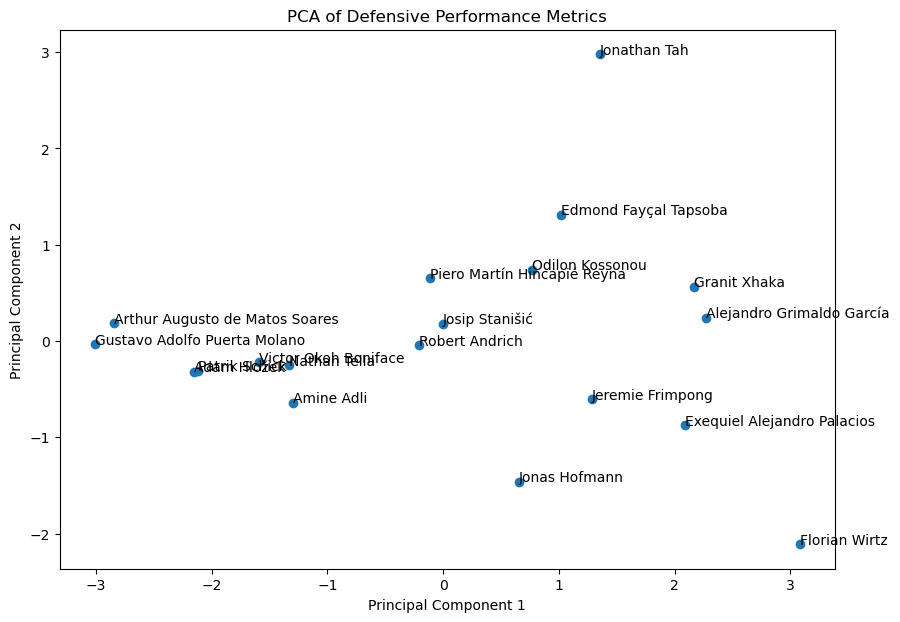

In [39]:
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(Defending_performance_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['player'] = players.reset_index(drop=True)

plt.figure(figsize=(10,7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

for i, player in enumerate(pca_df['player']):
    plt.annotate(player, (pca_df['PC1'][i], pca_df['PC2'][i]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Defensive Performance Metrics')
plt.show()

In [40]:
pca_components = pd.DataFrame(pca.components_, columns=Defending_performance_metrics.columns, index=['PC1', 'PC2'])
print(pca_components)

     total_duels_won  total_save_blocks  total_ball_recoveries  \
PC1         0.441592           0.530198               0.534380   
PC2        -0.182305           0.087153               0.068821   

     total_clearances  total_pressures  
PC1          0.248932         0.419951  
PC2          0.837797        -0.502523  


#### Attacking : 

In [114]:
attacking_data = grouped_events["shots"]
attacking_data= attacking_data[(attacking_data['possession_team'] == 'Bayer Leverkusen')]
attacking_columns = ['player' , 'position', 'under_pressure', 'shot_open_goal','shot_first_time','shot_outcome']
attacking_data = attacking_data[attacking_columns]

In [42]:
passing_data = grouped_events["passes"]
passing_data= passing_data[(passing_data['possession_team'] == 'Bayer Leverkusen')]
passing_columns = ['player' , 'position', 'under_pressure', 'pass_goal_assist',]
passing_data = passing_data[passing_columns]

In [43]:
### sucessfull shots : 

In [44]:
g_shots = attacking_data[attacking_data['shot_outcome'] == 'Goal']
total_goals = g_shots.groupby('player').size()
total_goals= total_goals.reset_index(name='total_goals')

In [45]:
### total shots per player

In [46]:
total_shots = attacking_data.groupby('player').size()
total_shots= total_shots.reset_index(name='total_shots')

In [47]:
Performance_data = pd.merge(total_shots, total_goals, on = 'player')
Performance_data['Goal Conversion Rate'] = Performance_data['total_goals']/ Performance_data['total_shots']

In [48]:
Performance_data

,player,total_shots,total_goals,Goal Conversion Rate
0,Adam Hložek,19,2,0.105263
1,Alejandro Grimaldo García,70,10,0.142857
2,Amine Adli,27,4,0.148148
3,Anton Stach,1,1,1.000000
4,Deniz Undav,1,1,1.000000
5,Exequiel Alejandro Palacios,21,4,0.190476
6,Florian Wirtz,70,11,0.157143
7,Granit Xhaka,44,3,0.068182
8,Jeremie Frimpong,55,9,0.163636
9,Jonas Hofmann,61,4,0.065574


In [49]:
### keeping only players with more than 7 goals

In [50]:
Performance_data_filtered  = Performance_data[Performance_data['total_goals'] > 7]

In [51]:
Performance_data_filtered 

,player,total_shots,total_goals,Goal Conversion Rate
1,Alejandro Grimaldo García,70,10,0.142857
6,Florian Wirtz,70,11,0.157143
8,Jeremie Frimpong,55,9,0.163636
17,Victor Okoh Boniface,79,14,0.177215


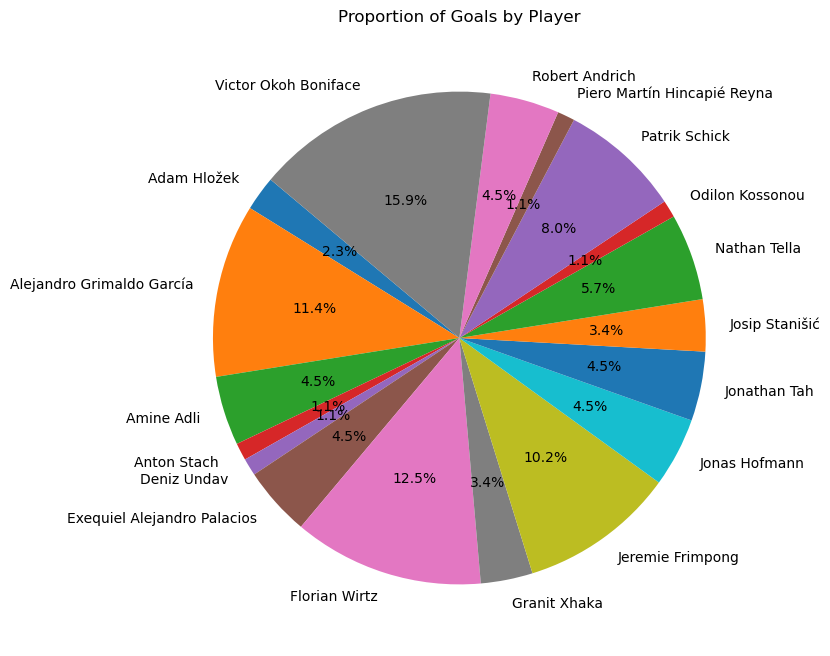

In [52]:
plt.figure(figsize=(8, 8))
plt.pie(Performance_data['total_goals'], labels=Performance_data['player'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Goals by Player')
plt.show()

In [53]:
### Assits 

In [54]:
total_assist = passing_data.groupby('player').size()
assists_count = passing_data.groupby('player')['pass_goal_assist'].sum().reset_index(name='total_assists')
#assists_count = assists_count[assists_count['total_assists'] > 1]

In [55]:
assists_count

,player,total_assists
0,Adam Hložek,2
1,Adrian Beck,0
2,Alassane Pléa,0
3,Alejandro Grimaldo García,13
4,Aleksandar Pavlović,0
...,...,...
281,Woo-Yeong Jeong,0
282,Wout Weghorst,0
283,Xaver Schlager,0
284,Xavi Simons,0


In [56]:
Total_contribution = pd.merge(Performance_data,assists_count, on ="player")

In [57]:
Total_contribution['Goals Contribution'] = Total_contribution['total_goals'] + Total_contribution['total_assists']

In [58]:
Total_contribution

,player,total_shots,total_goals,Goal Conversion Rate,total_assists,Goals Contribution
0,Adam Hložek,19,2,0.105263,2,4
1,Alejandro Grimaldo García,70,10,0.142857,13,23
2,Amine Adli,27,4,0.148148,5,9
3,Anton Stach,1,1,1.000000,0,1
4,Deniz Undav,1,1,1.000000,0,1
5,Exequiel Alejandro Palacios,21,4,0.190476,4,8
6,Florian Wirtz,70,11,0.157143,10,21
7,Granit Xhaka,44,3,0.068182,0,3
8,Jeremie Frimpong,55,9,0.163636,7,16
9,Jonas Hofmann,61,4,0.065574,7,11


In [59]:
## PCA :

In [60]:
numeric_data = Total_contribution.drop(columns=['player'])
Pca_data = StandardScaler().fit_transform(numeric_data)

In [61]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(Pca_data)
pca_df = pd.DataFrame(data=pca_result, columns = ['PC1','PC2'])
pca_df['player'] = Total_contribution['player']

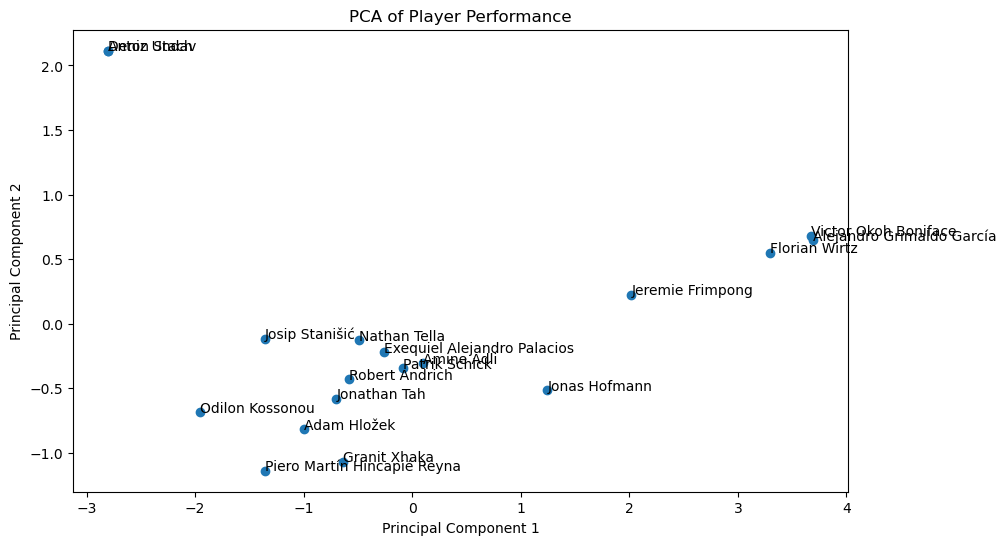

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
for i, player in enumerate(pca_df['player']):
    plt.annotate(player, (pca_df['PC1'][i], pca_df['PC2'][i]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Player Performance')
plt.show()

In [63]:
#togliere 
component_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=numeric_data.columns)

In [64]:
print(component_loadings)

                           PC1       PC2
total_shots           0.487864 -0.049711
total_goals           0.474353  0.184327
Goal Conversion Rate -0.260225  0.944701
total_assists         0.468793  0.182576
Goals Contribution    0.499494  0.194317


### 360 DATA : 

In [8]:
frames_df = sb.competition_frames(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")
frames_df.rename(columns={'event_uuid': 'id'}, inplace = True)

In [9]:
merged_df=pd.merge( grouped_events["passes"],frames_df,
how="left", on=["id"])

In [10]:

leverkusen_360 = merged_df[(merged_df["possession_team"] == "Bayer Leverkusen") ].reset_index(drop=True)

In [12]:
leverkusen_360 = leverkusen_360.dropna(subset=['location_y'])

In [83]:
"""events_df = sb.competition_events(

country="Germany",

division="1. Bundesliga",

season="2023/2024",

gender="male")"""

In [33]:
"""frames_df = sb.competition_frames(

country="Germany",

division="1. Bundesliga",

season="2023/2024",

gender="male")


frames_df.rename(columns={'event_uuid': 'id'}, inplace = True)

merged_df=pd.merge(frames_df, events_df, how="left", on=["id"])"""

In [59]:
def is_player_in_range(row):
    if row['teammate']:
        return False  
    player_x, player_y = row['location_y']
    start_x, start_y = row['location_x']
    end_x, end_y = row['pass_end_location']

    # Check if player's x and y coordinates are between the start and end locations
    in_x_range = min(start_x, end_x) <= player_x <= max(start_x, end_x)
    in_y_range = min(start_y, end_y) <= player_y <= max(start_y, end_y)

    return in_x_range and in_y_range

# Create the new column
leverkusen_360['player_in_pass_range'] = leverkusen_360.apply(is_player_in_range, axis=1)

In [75]:
# Filter for Bayer Leverkusen players
leverkusen_players = leverkusen_360[leverkusen_360['team'] == 'Bayer Leverkusen']

# Group by player and count how many times they have 'True' in 'player_in_pass_range'
leverkusen_pass_range_counts = pd.DataFrame(leverkusen_players.groupby('player')['player_in_pass_range'].sum()).rename(columns={'player_in_pass_range': 'Total_players_bypassed '})

In [79]:
leverkusen_pass_range_counts

,Total_players_bypassed
player,
Adam Hložek,62
Alejandro Grimaldo García,1154
Amine Adli,159
Arthur Augusto de Matos Soares,51
Borja Iglesias Quintas,32
Edmond Fayçal Tapsoba,749
Exequiel Alejandro Palacios,785
Florian Wirtz,919
Granit Xhaka,1704


In [112]:
########### MAPS

In [88]:
sb.matches(competition_id=9, season_id=281)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,...,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,...,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,...,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,...,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,...,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2
5,3895286,2024-03-30,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Hoffenheim,2,1,available,...,2024-05-08T03:36:21.320065,27,Regular Season,BayArena,Deniz Aytekin,Xabier Alonso Olano,Pellegrino Matarazzo,1.1.0,2,2
6,3895220,2024-02-03,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Darmstadt 98,Bayer Leverkusen,0,2,available,...,2024-05-08T01:01:15.978489,20,Regular Season,Merck-Stadion am Böllenfalltor,Tobias Reichel,Torsten Lieberknecht,Xabier Alonso Olano,1.1.0,2,2
7,3895250,2024-02-23,21:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,FSV Mainz 05,2,1,available,...,2024-05-08T00:38:33.864825,23,Regular Season,BayArena,Timo Gerach,Xabier Alonso Olano,Bo Henriksen,1.1.0,2,2
8,3895266,2024-03-10,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Wolfsburg,2,0,available,...,2024-04-28T10:29:53.455142,25,Regular Season,BayArena,Daniel Siebert,Xabier Alonso Olano,Niko Kovač,1.1.0,2,2
9,3895275,2024-03-17,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Freiburg,Bayer Leverkusen,2,3,available,...,2024-04-19T22:39:18.935666,26,Regular Season,Europa-Park Stadion,Harm Osmers,Christian Streich,Xabier Alonso Olano,1.1.0,2,2


In [96]:
import pandas as pd

# Assume `leverkusen_360` is your DataFrame and `match_id` is the ID of the match you're interested in
match_id = 3895333
player_name = 'Granit Xhaka'

# Filter passes for the specific match
passes_in_match = leverkusen_360[leverkusen_360['match_id_x'] == match_id]

# Further filter by player
xhaka_passes = passes_in_match[passes_in_match['player'] == player_name]

xhaka_passes_df = pd.DataFrame(xhaka_passes)
xhaka_passes_df= xhaka_passes_df.drop_duplicates(subset=['x_start'])


In [98]:
xhaka_passes_df['x_start'] = xhaka_passes_df['x_start']*1.2
xhaka_passes_df['y_start'] = xhaka_passes_df['y_start']*.8
xhaka_passes_df['x_end'] = xhaka_passes_df['x_end']*1.2
xhaka_passes_df['y_end'] = xhaka_passes_df['y_end']*.8

In [91]:
from mplsoccer.pitch import Pitch
import seaborn as sns

In [102]:
from mplsoccer import Pitch

pitch = Pitch()  # This may cause an error if 'orientation' is not a valid argument

Text(0.5, 1.0, 'Granit Xhaka Pass Map vs Eintracht Frankfurt')

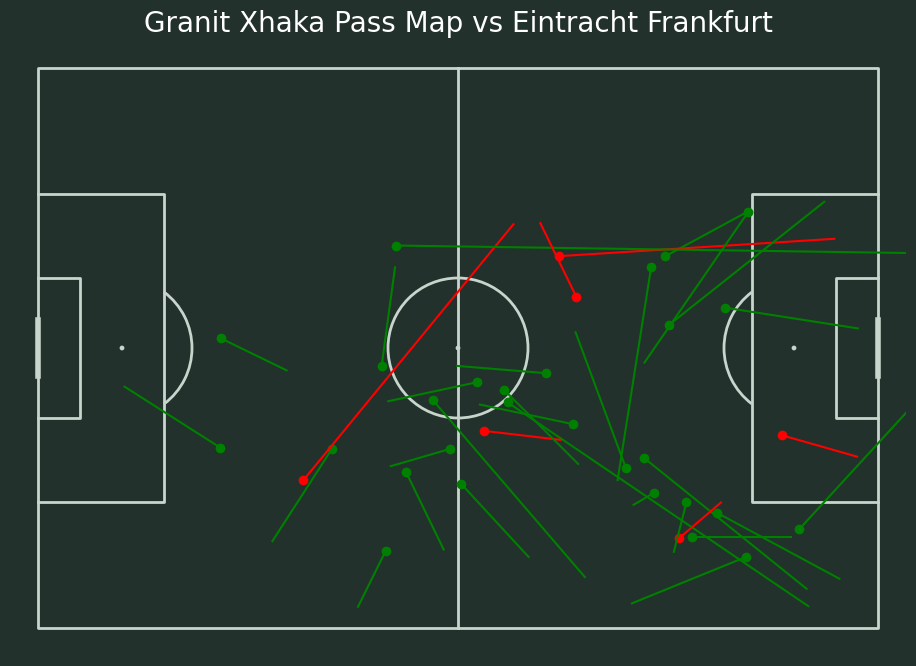

In [110]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc')

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#use a for loop to plot each pass
for x in range(len(xhaka_passes_df)):
    if xhaka_passes_df.iloc[x]['teammate']:  # Use .iloc for positional indexing
        plt.plot((xhaka_passes_df.iloc[x]['x_start'], xhaka_passes_df.iloc[x]['x_end']), 
                 (xhaka_passes_df.iloc[x]['y_start'], xhaka_passes_df.iloc[x]['y_end']), 
                 color='green')
        plt.scatter(xhaka_passes_df.iloc[x]['x_start'], xhaka_passes_df.iloc[x]['y_start'], color='green')
    else:
        plt.plot((xhaka_passes_df.iloc[x]['x_start'], xhaka_passes_df.iloc[x]['x_end']), 
                 (xhaka_passes_df.iloc[x]['y_start'], xhaka_passes_df.iloc[x]['y_end']), 
                 color='red')
        plt.scatter(xhaka_passes_df.iloc[x]['x_start'], xhaka_passes_df.iloc[x]['y_start'], color='red')


plt.title('Granit Xhaka Pass Map vs Eintracht Frankfurt',color='white',size=20)

In [111]:
sb.matches(competition_id=9, season_id=281).iloc[2]

match_id                                    3895333
match_date                               2024-05-05
kick_off                               18:30:00.000
competition                 Germany - 1. Bundesliga
season                                    2023/2024
home_team                       Eintracht Frankfurt
away_team                          Bayer Leverkusen
home_score                                        1
away_score                                        5
match_status                              available
match_status_360                          available
last_updated             2024-05-14T16:23:06.325967
last_updated_360         2024-05-14T16:32:13.483516
match_week                                       32
competition_stage                    Regular Season
stadium                          Deutsche Bank Park
referee                           Christian Dingert
home_managers                       Dino Toppmöller
away_managers                   Xabier Alonso Olano
data_version